In [ ]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install requests

In [42]:
import torch

from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

from torchvision.models import resnet50, ResNet50_Weights, ResNet
from torchvision import datasets, transforms
import torchvision.models as models

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

class_names = ['Aster', 'Daisy', 'Iris', 'Lavender', 'Lily', 'Marigold', 'Orchid', 'Poppy', 'Rose', 'Sunflower']

torch.serialization.add_safe_globals([ResNet])  # ou torchvision.models.resnet.ResNet

model = torch.load(
    './Models/resnet50_flowers_dataset-25-epochs.h5',
    weights_only=False  # garante que ele vai carregar o modelo completo
)

In [44]:
test_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
])

test_dataset  = datasets.ImageFolder('./Dataset/Testing Data', transform=test_transforms)

test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [46]:
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [47]:
accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}\n")

print(classification_report(all_labels, all_preds, target_names=class_names))

Accuracy: 0.9100

              precision    recall  f1-score   support

       Aster       0.93      0.88      0.90       500
       Daisy       0.90      0.96      0.93       500
        Iris       0.94      0.89      0.91       500
    Lavender       0.91      0.90      0.90       500
        Lily       0.84      0.90      0.87       500
    Marigold       0.90      0.94      0.92       500
      Orchid       0.88      0.87      0.87       500
       Poppy       0.93      0.84      0.88       500
        Rose       0.94      0.95      0.94       500
   Sunflower       0.96      0.97      0.96       500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



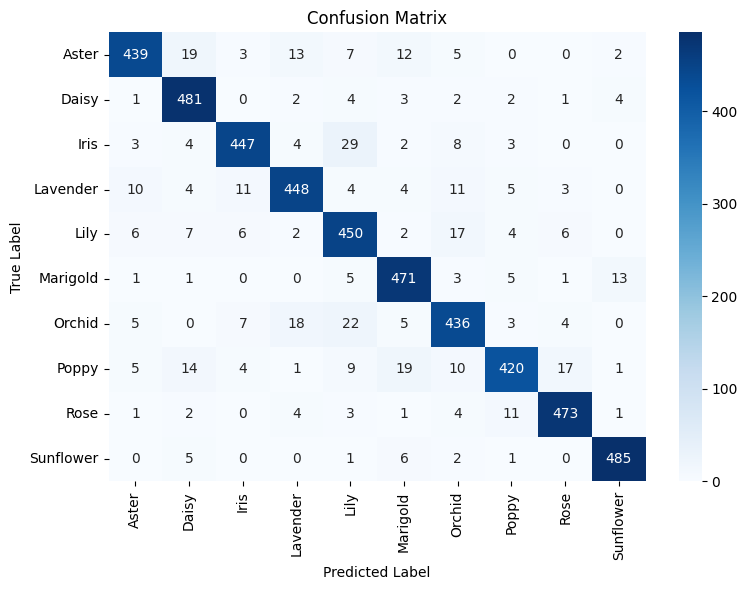

In [48]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
